___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [20]:
df = pd.read_csv('kyphosis.csv')

In [21]:
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


## EDA

We'll just check out a simple pairplot for this small dataset.

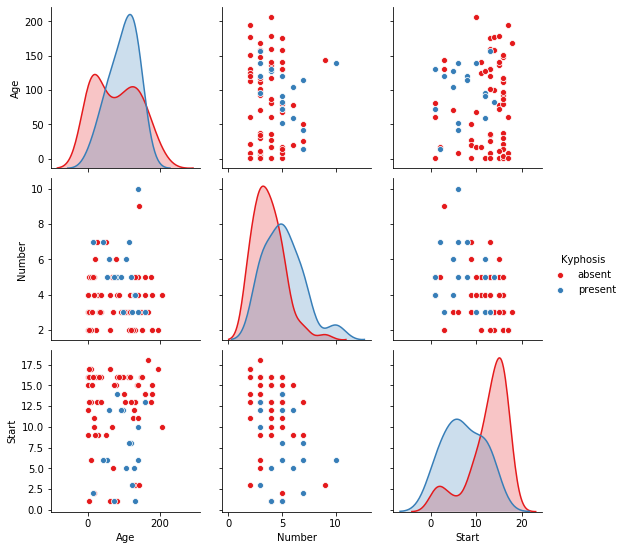

In [22]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [29]:
predictions = dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.71      0.79        21
     present       0.25      0.50      0.33         4

    accuracy                           0.68        25
   macro avg       0.57      0.61      0.56        25
weighted avg       0.78      0.68      0.72        25



In [44]:

print(confusion_matrix(y_test,predictions))
17/25

[[15  6]
 [ 2  2]]


0.68

In [48]:
y_test

29     absent
58     absent
11     absent
17     absent
77     absent
63     absent
37    present
19     absent
69     absent
64     absent
14     absent
42     absent
48    present
34     absent
38     absent
50     absent
8      absent
44     absent
16     absent
76    present
36     absent
47     absent
49     absent
54     absent
57    present
Name: Kyphosis, dtype: object

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [34]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features


['Age', 'Number', 'Start']

In [16]:
#!pip install pydot

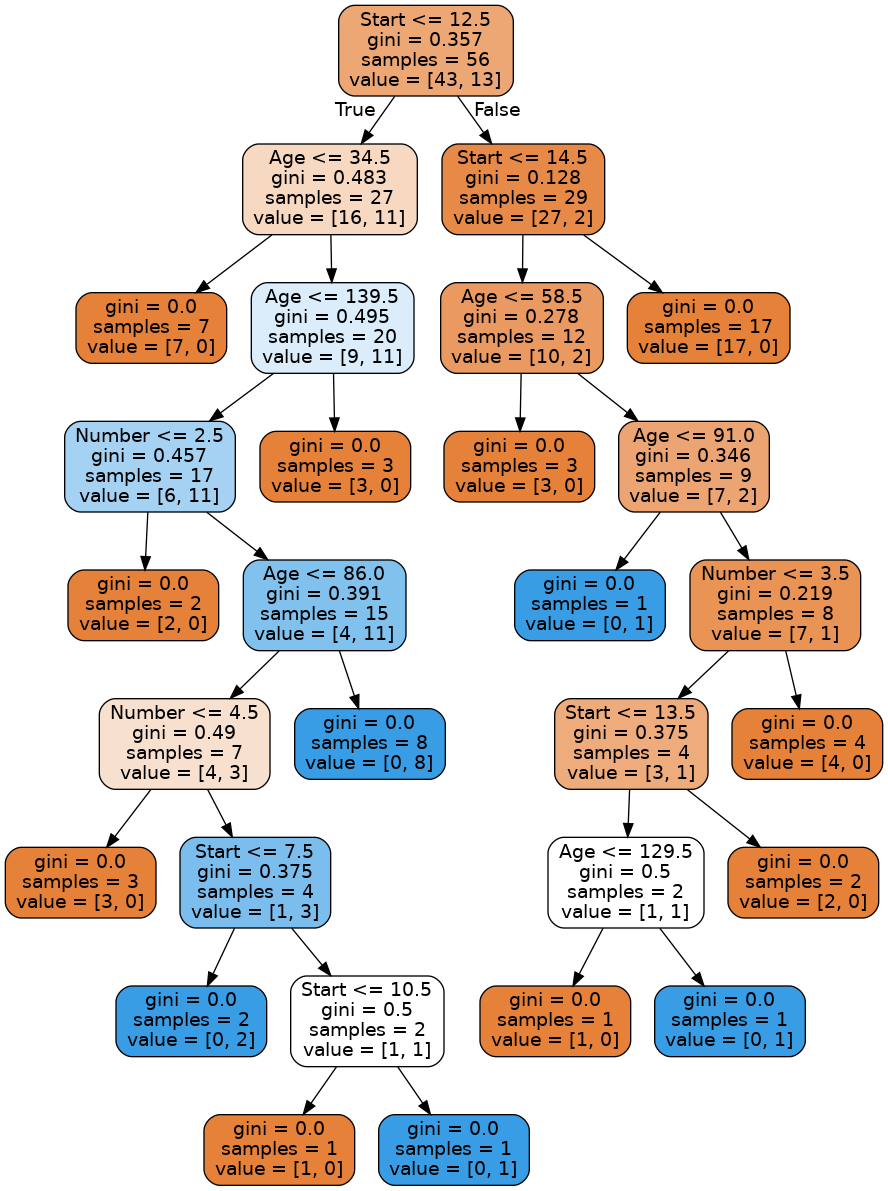

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


## Random Forests

Now let's compare the decision tree model to a random forest.

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

,Age,Number,Start
74,11,3,15
25,9,5,13
59,102,3,13
68,18,4,11
27,100,3,14


In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
print(confusion_matrix(y_test,rfc_pred))

[[16  5]
 [ 3  1]]


In [40]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.84      0.76      0.80        21
     present       0.17      0.25      0.20         4

    accuracy                           0.68        25
   macro avg       0.50      0.51      0.50        25
weighted avg       0.73      0.68      0.70        25



# Great Job!